In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv(r'/content/drive/My Drive/Python/titanic/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [0]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [0]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum())

데이터 세트 Null 값 개수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [0]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Emarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N                  687
B96 B98              4
C23 C25 C27          4
G6                   4
D                    3
E101                 3
F2                   3
F33                  3
C22 C26              3
F4                   2
B20                  2
B51 B53 B55          2
F G73                2
B77                  2
D33                  2
E67                  2
D36                  2
C124                 2
C52                  2
B28                  2
E33                  2
C78                  2
D26                  2
B18                  2
E44                  2
B5                   2
C83                  2
B57 B59 B63 B66      2
B22                  2
C123                 2
                  ... 
D9                   1
C101                 1
B42                  1
C85                  1
A24                  1
E31                  1
A14                  1
E50                  1
E17                  

In [0]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [0]:
print('Sex값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N                  687
B96 B98              4
C23 C25 C27          4
G6                   4
D                    3
E101                 3
F2                   3
F33                  3
C22 C26              3
F4                   2
B20                  2
B51 B53 B55          2
F G73                2
B77                  2
D33                  2
E67                  2
D36                  2
C124                 2
C52                  2
B28                  2
E33                  2
C78                  2
D26                  2
B18                  2
E44                  2
B5                   2
C83                  2
B57 B59 B63 B66      2
B22                  2
C123                 2
                  ... 
D9                   1
C101                 1
B42                  1
C85                  1
A24                  1
E31                  1
A14                  1
E50                  1
E17                  1


In [0]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [0]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

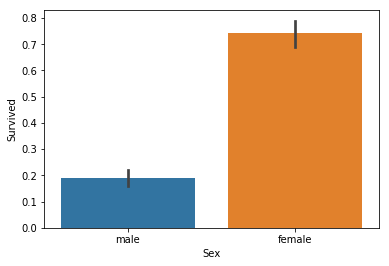

In [0]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

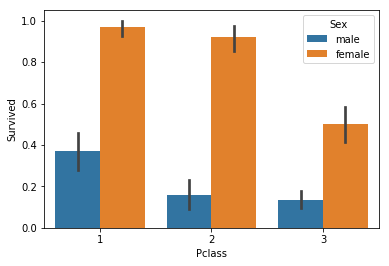

In [0]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

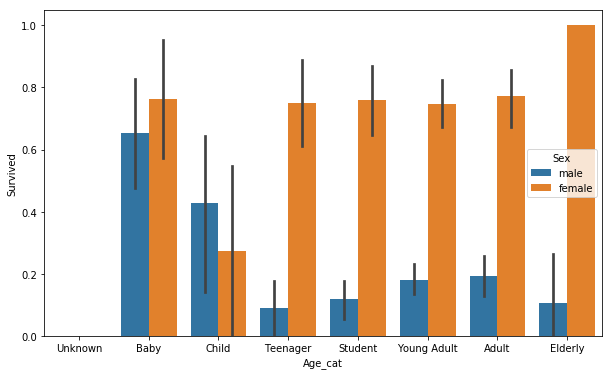

In [0]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat = ''
  if age <= -1 : cat = 'Unknown'
  elif age <= 5 : cat = 'Baby'
  elif age <= 12 : cat = 'Child'
  elif age <= 18 : cat = 'Teenager'
  elif age <= 25 : cat = 'Student'
  elif age <= 35 : cat = 'Young Adult'
  elif age <= 60 : cat = 'Adult'
  else : cat = 'Elderly'
  
  return cat

# 막대그래프 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1 , inplace = True)

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
    
  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [0]:


# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)
  
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거 
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df



In [0]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv(r'/content/drive/My Drive/Python/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정 트리, RandomForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 ; {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도 : 0.8324
LogisticRegression 정확도 ; 0.8659


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
import numpy as np
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
  # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores = []
  
  # KFold 교차 검증 수행.
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7542
평균 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
평균 정확도 : 0.7675
교차 검증 2 정확도 : 0.7865
평균 정확도 : 0.7739
교차 검증 3 정확도 : 0.7697
평균 정확도 : 0.7728
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 평가지표

왜 정확도만 믿으면 안 될까요?
편향에 빠질 수 있기 때문입니다.

예를 들어 ML 알고리즘을 적용한 뒤 예측 정확도의 결과가 보통 80%대였지만
탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 별다른 알고리즘의 적용 없이 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측 결과를 예측해도 이와 비슷한 수치가 나올 수 있습니다. 

다음의 코드를 직접 입력해보며 알아봅시다.

다음 예제에서는 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성합니다. 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있습니다.

In [0]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지 않음.
  def fit(self, X, y = None):
    pass
  
  # predict() 메서드는 단순히 sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else :
        pred[i] = 1
        
    return pred

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/drive/My Drive/ML/pymlguide/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 : 0.7877
